In this module, we complete exploratory data analysis in order to prepare the dataset for modelling of the Under-Five Mortality Rate (U5MR).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')
from collections import Counter
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#Importing some necessary libraries and functions

In [2]:
data = pd.read_csv('C:/Users/dralu/OneDrive/Documents/Franklin University/DATA 695/Key_indicator_districtwise.csv')
data
#Reading in and viewing the dataset

State_Name State_District_Name  AA_Sample_Units_Total  \
0          Assam             Barpeta                     53   
1          Assam          Bongaigaon                     89   
2          Assam              Cachar                    105   
3          Assam             Darrang                     26   
4          Assam             Dhemaji                    121   
..           ...                 ...                    ...   
279  Uttarakhand         Pithoragarh                    161   
280  Uttarakhand         Rudraprayag                    225   
281  Uttarakhand       Tehri Garhwal                    351   
282  Uttarakhand   Udham Singh Nagar                     81   
283  Uttarakhand          Uttarkashi                     98   

     AA_Sample_Units_Rural  AA_Sample_Units_Urban  AA_Households_Total  \
0                       47                      6                13711   
1                       73                     16                17384   
2                       84                     21                27488   
3                       24                      2                 5951   
4                      108                     13                14481   
..                     ...                    ...                  ...   
279                    136                     25                25265   
280                    222                      3                33117   
281                    317                     34                47792   
282                     45                     36                17887   
283                     89                      9                17945   

     AA_Households_Rural  AA_Households_Urban  AA_Population_Total  \
0                  12765                  946                64606   
1                  14904                 2480                84012   
2                  24207                 3281               127158   
3                   5769                  182                29048   
4                  12619                 1862                75451   
..                   ...                  ...                  ...   
279                20467                 4798               102999   
280                32914                  203               139025   
281                42354                 5438               205575   
282                12393                 5494                91518   
283                15683                 2262                76648   

     AA_Population_Rural  AA_Population_Urban  \
0                  60293                 4313   
1                  73899                10113   
2                 112171                14987   
3                  28256                  792   
4                  66537                 8914   
..                   ...                  ...   
279                84627                18372   
280               138266                  759   
281               181918                23657   
282                64614                26904   
283                67984                 8664   

     AA_Ever_Married_Women_Aged_15_49_Years_Total  \
0                                         12541.0   
1                                         16781.0   
2                                         23693.0   
3                                          5424.0   
4                                         14159.0   
..                                            ...   
279                                       21408.0   
280                                       28470.0   
281                                       40347.0   
282                                       16133.0   
283                                       14456.0   

     AA_Ever_Married_Women_Aged_15_49_Years_Rural  \
0                                         11692.0   
1                                         14591.0   
2                                         20881.0   
3                                          5277.0   
4                           

In [3]:
# Change index to 'State_District_Name', as it is a unique ID

data = data.set_index('State_District_Name')
data

State_Name  AA_Sample_Units_Total  \
State_District_Name                                       
Barpeta                    Assam                     53   
Bongaigaon                 Assam                     89   
Cachar                     Assam                    105   
Darrang                    Assam                     26   
Dhemaji                    Assam                    121   
...                          ...                    ...   
Pithoragarh          Uttarakhand                    161   
Rudraprayag          Uttarakhand                    225   
Tehri Garhwal        Uttarakhand                    351   
Udham Singh Nagar    Uttarakhand                     81   
Uttarkashi           Uttarakhand                     98   

                     AA_Sample_Units_Rural  AA_Sample_Units_Urban  \
State_District_Name                                                 
Barpeta                                 47                      6   
Bongaigaon                              73                     16   
Cachar                                  84                     21   
Darrang                                 24                      2   
Dhemaji                                108                     13   
...                                    ...                    ...   
Pithoragarh                            136                     25   
Rudraprayag                            222                      3   
Tehri Garhwal                          317                     34   
Udham Singh Nagar                       45                     36   
Uttarkashi                              89                      9   

                     AA_Households_Total  AA_Households_Rural  \
State_District_Name                                             
Barpeta                            13711                12765   
Bongaigaon                         17384                14904   
Cachar                             27488                24207   
Darrang                             5951                 5769   
Dhemaji                            14481                12619   
...                                  ...                  ...   
Pithoragarh                        25265                20467   
Rudraprayag                        33117                32914   
Tehri Garhwal                      47792                42354   
Udham Singh Nagar                  17887                12393   
Uttarkashi                         17945                15683   

                     AA_Households_Urban  AA_Population_Total  \
State_District_Name                                             
Barpeta                              946                64606   
Bongaigaon                          2480                84012   
Cachar                              3281               127158   
Darrang                              182                29048   
Dhemaji                             1862                75451   
...                                  ...                  ...   
Pithoragarh                         4798               102999   
Rudraprayag                          203               139025   
Tehri Garhwal                       5438               205575   
Udham Singh Nagar                   5494                91518   
Uttarkashi                          2262                76648   

                     AA_Population_Rural  AA_Population_Urban  \
State_District_Name                                             
Barpeta                            60293                 4313   
Bongaigaon                         73899                10113   
Cachar                            112171                14987   
Darrang                            28256                  792   
Dhemaji                            66537                 8914   
...                                  ...                  ...   
Pithoragarh                        84627                18372   
Rudraprayag                       138266                  759   
Tehri Garhwal 

In [4]:
# Fill empty and NaNs values with NaN
data = data.fillna(np.nan)

# Check for Null values
data.isnull().sum()

State_Name                                 0
AA_Sample_Units_Total                      0
AA_Sample_Units_Rural                      0
AA_Sample_Units_Urban                      0
AA_Households_Total                        0
                                          ..
ZZ_Sex_Ratio_At_Birth_Total_Upper_Limit    0
ZZ_Sex_Ratio_At_Birth_Rural_Lower_Limit    0
ZZ_Sex_Ratio_At_Birth_Rural_Upper_Limit    0
ZZ_Sex_Ratio_At_Birth_Urban_Lower_Limit    9
ZZ_Sex_Ratio_At_Birth_Urban_Upper_Limit    9
Length: 643, dtype: int64

In [5]:
#This is just a list of the columns containing ANY NaN values
nan_cols = [i for i in data.columns if data[i].isnull().any()]
nan_cols

['BB_Average_Household_Size_St_Urban',
 'CC_Sex_Ratio_At_Birth_Urban',
 'EE_Marriages_Among_Females_Below_Legal_Age_18_Years_Urban',
 'EE_Marriages_Among_Males_Below_Legal_Age_21_Years_Urban',
 'EE_Currently_Married_Women_Aged_20_24_Years_Married_Before_Legal_Age_18_Years_Urban',
 'EE_Currently_Married_Men_Aged_25_29_Years_Married_Before_Legal_Age_21_Years_Urban',
 'EE_Mean_Age_At_Marriage_Male_Urban',
 'EE_Mean_Age_At_Marriage_Female_Urban',
 'FF_Children_Currently_Attending_School_Age_6_17_Years_Person_Urban',
 'FF_Children_Currently_Attending_School_Age_6_17_Years_Male_Urban',
 'FF_Children_Currently_Attending_School_Age_6_17_Years_Female_Urban',
 'FF_Children_Attended_Before_Drop_Out_Age_6_17_Years_Person_Urban',
 'FF_Children_Attended_Before_Drop_Out_Age_6_17_Years_Male_Urban',
 'FF_Children_Attended_Before_Drop_Out_Age_6_17_Years_Female_Urban',
 'GG_Children_Aged_5_14_Years_Engaged_In_Work_Person_Urban',
 'GG_Children_Aged_5_14_Years_Engaged_In_Work_Male_Urban',
 'GG_Children_Age

In [6]:
len(nan_cols)
#199 columns have at least one null value.

199

In [7]:
#This is a list of columns which have at least one fifth of their values null.
nan_cols20 = [i for i in data.columns if data[i].isnull().sum() > 0.2*len(data)]
nan_cols20

['LL_Total_Fertility_Rate_Rural',
 'LL_Total_Fertility_Rate_Urban',
 'YY_Infant_Mortality_Rate_Imr_Urban_Person',
 'YY_Infant_Mortality_Rate_Imr_Urban_Male',
 'YY_Infant_Mortality_Rate_Imr_Urban_Female',
 'YY_Neo_Natal_Mortality_Rate_Urban',
 'YY_Post_Neo_Natal_Mortality_Rate_Urban',
 'YY_Under_Five_Mortality_Rate_U5MR_Urban_Person',
 'YY_Under_Five_Mortality_Rate_U5MR_Urban_Male',
 'YY_Under_Five_Mortality_Rate_U5MR_Urban_Female',
 'ZZ_Infant_Mortality_Rate_Urban_Lower_Limit',
 'ZZ_Infant_Mortality_Rate_Urban_Upper_Limit',
 'ZZ_Under_Five_Mortality_Rate_U5MR_Urban_Lower_Limit',
 'ZZ_Under_Five_Mortality_Rate_U5MR_Urban_Upper_Limit']

In [8]:
len(nan_cols20)
#There are 14 such values.

14

In [9]:
#How to check if a certain value is in the high NaN list.
#So I can use this if I am considering including a column in a data subset, or imputing its values, to see if it's worth it.
'YY_Under_Five_Mortality_Rate_U5MR_Total_Person' in nan_cols20
#And this is what my target variable is, so it is good that it is False!

False

In [10]:
data.describe()
#Summary statistics

AA_Sample_Units_Total  AA_Sample_Units_Rural  AA_Sample_Units_Urban  \
count             284.000000             284.000000             284.000000   
mean               72.862676              53.971831              18.890845   
std                49.310713              37.870795              24.083454   
min                10.000000               8.000000               2.000000   
25%                46.000000              34.000000               7.000000   
50%                60.000000              45.000000              12.000000   
75%                82.000000              61.000000              20.000000   
max               386.000000             337.000000             234.000000   

       AA_Households_Total  AA_Households_Rural  AA_Households_Urban  \
count           284.000000           284.000000           284.000000   
mean          15201.264085         12329.848592          2871.415493   
std            8360.819705          6621.757700          3900.137566   
min            2802.000000          2381.000000           153.000000   
25%            9971.500000          7997.750000           971.000000   
50%           13011.500000         10758.500000          1580.500000   
75%           17749.000000         15250.000000          3044.250000   
max           66535.000000         47183.000000         35763.000000   

       AA_Population_Total  AA_Population_Rural  AA_Population_Urban  \
count           284.000000           284.000000           284.000000   
mean          74178.753521         60517.820423         13660.933099   
std           38613.108658         31475.272720         17693.167257   
min           13892.000000         11722.000000           759.000000   
25%           49222.500000         40206.500000          4613.000000   
50%           65206.500000         53656.000000          7785.500000   
75%           88998.500000         73290.000000         14757.500000   
max          303009.000000        238744.000000        155980.000000   

       AA_Ever_Married_Women_Aged_15_49_Years_Total  \
count                                    284.000000   
mean                                   14012.871268   
std                                     7395.232081   
min                                     2501.000000   
25%                                     9229.250000   
50%                                    12368.500000   
75%                                    16442.750000   
max                                    56581.000000   

       AA_Ever_Married_Women_Aged_15_49_Years_Rural  \
count                                    284.000000   
mean                                   11402.258627   
std                                     5961.934809   
min                                     2134.000000   
25%                                     7498.000000   
50%                                     9901.000000   
75%                                    13794.500000   
max                                    45721.000000   

       AA_Ever_Married_Women_Aged_15_49_Years_Urban  \
count                                    284.000000   
mean                                    2610.612676   
std                                     3433.205107   
min                                      140.000000   
25%                                      887.250000   
50%                                     1479.500000   
75%                                     2744.000000   
max                                    29028.000000   

       AA_Currently_Married_Women_Aged_15_49_Years_Total  \
count                                         284.000000   
mean                                        13354.772570   
std                                          6986.504063   
min                                          2267.000000   
25%                                          8787.750000   
50%                                         11844.500000   
75%                                         15807.000000   
max                                   

In [11]:
#Impute missing values for all columns
#We are doing this based on state, with the assumption that,
#even though healthcare and other situations may vary greatly within a given state,
#there are likely some commonalities shared by each district of a state
#which makes it the best basis for imputation in this case.

data = data.fillna(data.groupby('State_Name').transform('mean'))
data

State_Name  AA_Sample_Units_Total  \
State_District_Name                                       
Barpeta                    Assam                     53   
Bongaigaon                 Assam                     89   
Cachar                     Assam                    105   
Darrang                    Assam                     26   
Dhemaji                    Assam                    121   
...                          ...                    ...   
Pithoragarh          Uttarakhand                    161   
Rudraprayag          Uttarakhand                    225   
Tehri Garhwal        Uttarakhand                    351   
Udham Singh Nagar    Uttarakhand                     81   
Uttarkashi           Uttarakhand                     98   

                     AA_Sample_Units_Rural  AA_Sample_Units_Urban  \
State_District_Name                                                 
Barpeta                                 47                      6   
Bongaigaon                              73                     16   
Cachar                                  84                     21   
Darrang                                 24                      2   
Dhemaji                                108                     13   
...                                    ...                    ...   
Pithoragarh                            136                     25   
Rudraprayag                            222                      3   
Tehri Garhwal                          317                     34   
Udham Singh Nagar                       45                     36   
Uttarkashi                              89                      9   

                     AA_Households_Total  AA_Households_Rural  \
State_District_Name                                             
Barpeta                            13711                12765   
Bongaigaon                         17384                14904   
Cachar                             27488                24207   
Darrang                             5951                 5769   
Dhemaji                            14481                12619   
...                                  ...                  ...   
Pithoragarh                        25265                20467   
Rudraprayag                        33117                32914   
Tehri Garhwal                      47792                42354   
Udham Singh Nagar                  17887                12393   
Uttarkashi                         17945                15683   

                     AA_Households_Urban  AA_Population_Total  \
State_District_Name                                             
Barpeta                              946                64606   
Bongaigaon                          2480                84012   
Cachar                              3281               127158   
Darrang                              182                29048   
Dhemaji                             1862                75451   
...                                  ...                  ...   
Pithoragarh                         4798               102999   
Rudraprayag                          203               139025   
Tehri Garhwal                       5438               205575   
Udham Singh Nagar                   5494                91518   
Uttarkashi                          2262                76648   

                     AA_Population_Rural  AA_Population_Urban  \
State_District_Name                                             
Barpeta                            60293                 4313   
Bongaigaon                         73899                10113   
Cachar                            112171                14987   
Darrang                            28256                  792   
Dhemaji                            66537                 8914   
...                                  ...                  ...   
Pithoragarh                        84627                18372   
Rudraprayag                       138266                  759   
Tehri Garhwal 

In [12]:
#Move target column to end for ease.

data = data.reindex(columns = [col for col in data.columns if col != 'YY_Under_Five_Mortality_Rate_U5MR_Total_Person'] + ['YY_Under_Five_Mortality_Rate_U5MR_Total_Person'])
data

State_Name  AA_Sample_Units_Total  \
State_District_Name                                       
Barpeta                    Assam                     53   
Bongaigaon                 Assam                     89   
Cachar                     Assam                    105   
Darrang                    Assam                     26   
Dhemaji                    Assam                    121   
...                          ...                    ...   
Pithoragarh          Uttarakhand                    161   
Rudraprayag          Uttarakhand                    225   
Tehri Garhwal        Uttarakhand                    351   
Udham Singh Nagar    Uttarakhand                     81   
Uttarkashi           Uttarakhand                     98   

                     AA_Sample_Units_Rural  AA_Sample_Units_Urban  \
State_District_Name                                                 
Barpeta                                 47                      6   
Bongaigaon                              73                     16   
Cachar                                  84                     21   
Darrang                                 24                      2   
Dhemaji                                108                     13   
...                                    ...                    ...   
Pithoragarh                            136                     25   
Rudraprayag                            222                      3   
Tehri Garhwal                          317                     34   
Udham Singh Nagar                       45                     36   
Uttarkashi                              89                      9   

                     AA_Households_Total  AA_Households_Rural  \
State_District_Name                                             
Barpeta                            13711                12765   
Bongaigaon                         17384                14904   
Cachar                             27488                24207   
Darrang                             5951                 5769   
Dhemaji                            14481                12619   
...                                  ...                  ...   
Pithoragarh                        25265                20467   
Rudraprayag                        33117                32914   
Tehri Garhwal                      47792                42354   
Udham Singh Nagar                  17887                12393   
Uttarkashi                         17945                15683   

                     AA_Households_Urban  AA_Population_Total  \
State_District_Name                                             
Barpeta                              946                64606   
Bongaigaon                          2480                84012   
Cachar                              3281               127158   
Darrang                              182                29048   
Dhemaji                             1862                75451   
...                                  ...                  ...   
Pithoragarh                         4798               102999   
Rudraprayag                          203               139025   
Tehri Garhwal                       5438               205575   
Udham Singh Nagar                   5494                91518   
Uttarkashi                          2262                76648   

                     AA_Population_Rural  AA_Population_Urban  \
State_District_Name                                             
Barpeta                            60293                 4313   
Bongaigaon                         73899                10113   
Cachar                            112171                14987   
Darrang                            28256                  792   
Dhemaji                            66537                 8914   
...                                  ...                  ...   
Pithoragarh                        84627                18372   
Rudraprayag                       138266                  759   
Tehri Garhwal 

In [13]:
data.shape
#So everything is fine, I have all columns and they have all their values.

(284, 643)

Getting into data visualization and feature engineering.
Let's use subject matter expertise to inspect the dataset features and pick out some that seem promising.
Let's make a tier 1 (more likely to be relevant) and tier 2 (not quite as likely) list
So, just for the sake of feasibility, we have compiled dozens, maybe even close to 100, features into the originial Tier 1 and Tier 2 lists, but are trying to delete any that seem unlikely to be highly correlated with U5MR, or whose information is sort of covered in other features. We cut out a lot, but many still remain.
Of course, State_Name must be retained, and District_State_Name is the ID.

###Tier 1###
AA_Sample_Units_Total [R/U]
AA_Households_Total [R/U]
AA_Population_Total [R/U]
BB_Average_Household_Size_All_Total [R/U]
BB_Population_Below_Age_15_Years_Total [R/U]
BB_Dependency_Ratio_Total [R/U]
BB_Currently_Married_Illiterate_Women_Aged_15_49_Years_Total [R/U]
CC_Sex_Ratio_At_Birth_Total [R/U]
CC_Sex_Ratio_0_4_Years_Total [R/U]
CC_Sex_Ratio_All_Ages_Total [R/U]
DD_Person_Total [R/U]
DD_Male_Total [R/U]
DD_Female_Total [R/U]
EE_Mean_Age_At_Marriage_Male_Total [R/U]
EE_Mean_Age_At_Marriage_Female_Total [R/U]
FF_Children_Currently_Attending_School_Age_6_17_Years_Person_Total [R/U] [M/F]
GG_Children_Aged_5_14_Years_Engaged_In_Work_Person_Total [R/U] [M/F]
GG_Work_Participation_Rate_15_Years_And_Above_Person_Total [R/U] [M/F]
LL_Crude_Birth_Rate_Cbr_Total [R/U]
LL_Natural_Growth_Rate_Total [R/U]
LL_Total_Fertility_Rate_Total [R/U]
LL_Women_With_Two_Children_Wanting_No_More_Children_Total [R/U]
LL_Median_Age_At_First_Live_Birth_Of_Women_Aged_15_49_Years_Total [R/U]
LL_Median_Age_At_First_Live_Birth_Of_Women_Aged_25_49_Years_Total [R/U]
LL_Live_Births_Taking_Place_After_An_Interval_Of_36_Months_Total [R/U]
LL_Mean_Number_Of_Children_Ever_Born_To_Women_Aged_15_49_Years_Total [R/U]
LL_Mean_Number_Of_Children_Surviving_To_Women_Aged_15_49_Years_Total [R/U]
MM_Pregnancy_To_Women_Aged_15_49_Years_Resulting_In_Abortion_Total [R/U]
MM_Abortion_Performed_By_Skilled_Health_Personnel_Total [R/U]
MM_Abortion_Taking_Place_In_Institution_Total [R/U]
NN_Current_Usage_Any_Method_Total [R/U]
OO_Total_Unmet_Need_Total [R/U]
PP_Mothers_Who_Received_Any_Antenatal_Check_Up_Total [R/U]
QQ_Safe_Delivery_Total [R/U]
RR_New_Borns_Who_Were_Checked_Up_Within_24_Hrs_Of_Birth_Total [R/U]
TT_Children_Aged_12_23_Months_Fully_Immunized_Total [R/U]
TT_Children_Who_Did_Not_Receive_Any_Vaccination_Total [R/U]
VV_Children_Aged_6_35_Months_Exclusively_Breastfed_For_At_Least_Six_Months_Total [R/U]
WW_Birth_Registered_Total [R/U]
WW_Children_Whose_Birth_Was_Registered_And_Received_Birth_Certificate_Total [R/U]
YY_Crude_Death_Rate_Cdr_Total_Person [R/U] [M/F]
YY_Infant_Mortality_Rate_Imr_Total_Person [U/R] [M/F]
YY_Neo_Natal_Mortality_Rate_Total [R/U] [M/F]
YY_Post_Neo_Natal_Mortality_Rate_Total [R/U]

###Tier 2###
JJ_Persons_Suffering_From_Acute_Illness_Per_100000_Population_Diarrhoea_Dysentery_Person_Total [R/U] [M/F]
JJ_Persons_Suffering_From_Acute_Illness_Per_100000_Population_Acute_Respiratory_Infection_Ari_Person_Total [R/U] [M/F]
JJ_Persons_Suffering_From_Acute_Illness_Per_100000_Population_Fever_All_Types_Person_Total [R/U] [M/F]
JJ_Persons_Suffering_From_Acute_Illness_And_Taking_Treatment_From_Any_Source_Person_Total [R/U] [M/F]
JJ_Persons_Suffering_From_Acute_Illness_And_Taking_Treatment_From_Government_Source_Person_Total [R/U] [M/F]
KK_Having_Any_Kind_Of_Symptoms_Of_Chronic_Illness_Per_100000_Population_Person_Total [R/U] [M/F]
KK_Having_Any_Kind_Of_Symptoms_Of_Chronic_Illness_And_Sought_Medical_Care_Person_Total [R/U] [M/F]
KK_Having_Diagnosed_For_Any_Kind_Of_Chronic_Illness_And_Getting_Regular_Treatment_Person_Total [R/U] [M/F]
KK_Having_Diagnosed_For_Any_Kind_Of_Chronic_Illness_And_Getting_Regular_Treatment_From_Government_Source_Person_Total [R/U] [M/F]
MM_Women_Who_Received_Any_Anc_Before_Abortion_Total [R/U]
QQ_Institutional_Delivery_Total [R/U]
QQ_Delivery_At_Government_Institution_Total [R/U]
QQ_Delivery_At_Private_Institution_Total [R/U]
QQ_Delivery_At_Home_Total [R/U]
QQ_Delivery_At_Home_Conducted_By_Skilled_Health_Personnel_Total [R/U]
QQ_Caesarean_Out_Of_Total_Delivery_Taken_Place_In_Government_Institutions_Total [R/U]
QQ_Caesarean_Out_Of_Total_Delivery_Taken_Place_In_Private_Institutions_Total [R/U]
RR_Mothers_Who_Received_Post_Natal_Check_Up_Within_48_Hrs_Of_Delivery_Total [R/U]
RR_Mothers_Who_Received_Post_Natal_Check_Up_Within_1_Week_Of_Delivery_Total [R/U]
RR_Mothers_Who_Did_Not_Receive_Any_Post_Natal_Check_Up_Total [R/U]
SS_Mothers_Who_Availed_Financial_Assistance_For_Delivery_Under_Jsy_Total [R/U]
TT_Children_With_Birth_Weight_Less_Than_2_5_Kg_Total [R/U]
UU_Children_Suffering_From_Diarrhoea_Total [R/U]
UU_Children_Suffering_From_Acute_Respiratory_Infection_Total [R/U]
UU_Children_Suffering_From_Fever_Total [R/U]
XX_Women_Who_Are_Aware_Of_Hiv_Aids_Total [R/U]
XX_Women_Who_Are_Aware_Of_Rti_Sti_Total [R/U]
XX_Women_Who_Are_Aware_Of_Haf_Ors_Ort_Zinc_Total [R/U]
XX_Women_Who_Are_Aware_Of_Danger_Signs_Of_Ari_Pneumonia_Total [R/U]

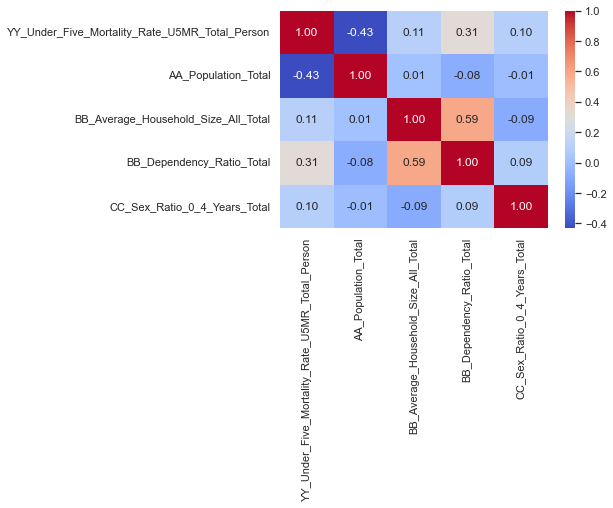

In [14]:
#Correlation matrix between target and some other important-seeming variables.
#We do not need to standardize before correlating.

graph = sns.heatmap(data[["YY_Under_Five_Mortality_Rate_U5MR_Total_Person","AA_Population_Total","BB_Average_Household_Size_All_Total","BB_Dependency_Ratio_Total","CC_Sex_Ratio_0_4_Years_Total"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

#From this, we see that AA_Population_Total and BB_Dependency_Ratio_Total are strongly correlated with the target.

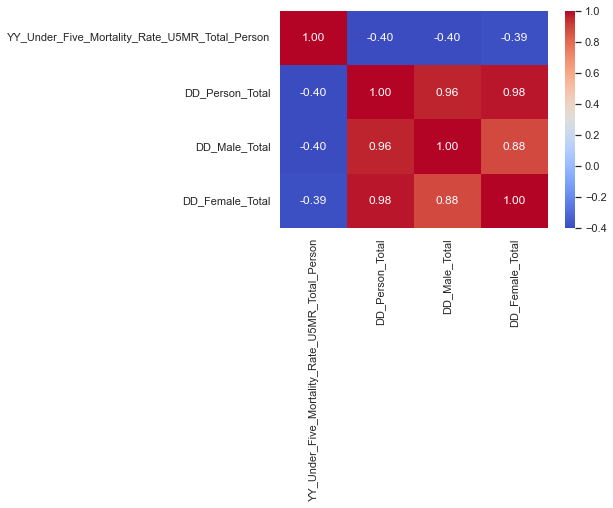

In [15]:
#Another correlation matrix between target and some other important-seeming variables.

graph = sns.heatmap(data[["YY_Under_Five_Mortality_Rate_U5MR_Total_Person","DD_Person_Total","DD_Male_Total","DD_Female_Total"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

#From this, we see that literacy rates for total, as well as divided by gender,
# are strongly but almost equally correlated with the target.

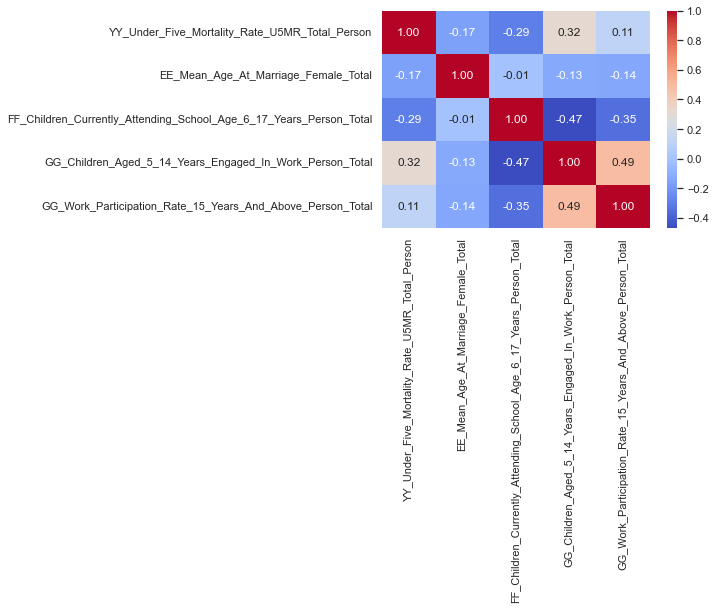

In [16]:
#Correlation matrix between target and some other important-seeming varaibles.

graph = sns.heatmap(data[["YY_Under_Five_Mortality_Rate_U5MR_Total_Person","EE_Mean_Age_At_Marriage_Female_Total","FF_Children_Currently_Attending_School_Age_6_17_Years_Person_Total","GG_Children_Aged_5_14_Years_Engaged_In_Work_Person_Total", "GG_Work_Participation_Rate_15_Years_And_Above_Person_Total"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

#From this, we see that FF_Children_Currently_Attending_School_Age_6_17_Years_Person_Total
# and GG_Children_Aged_5_14_Years_Engaged_In_Work_Person_Total are somewhat strongly correlated with the target.
# We can take them forward.

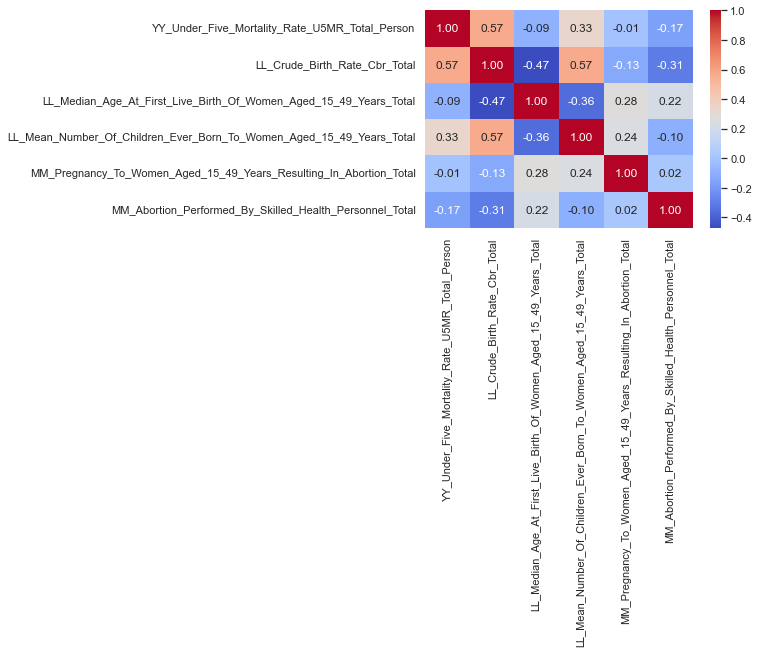

In [17]:
#Correlation matrix between target and some other important-seeming varaibles.

graph = sns.heatmap(data[["YY_Under_Five_Mortality_Rate_U5MR_Total_Person","LL_Crude_Birth_Rate_Cbr_Total", "LL_Median_Age_At_First_Live_Birth_Of_Women_Aged_15_49_Years_Total", "LL_Mean_Number_Of_Children_Ever_Born_To_Women_Aged_15_49_Years_Total", "MM_Pregnancy_To_Women_Aged_15_49_Years_Resulting_In_Abortion_Total", "MM_Abortion_Performed_By_Skilled_Health_Personnel_Total"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

#From this, we see that LL_Crude_Birth_Rate_Cbr_Total is very strongly correlated with the target,
# and LL_Mean_Number_Of_Children_Ever_Born_To_Women_Aged_15_49_Years_Total is somewhat strongly correlated.

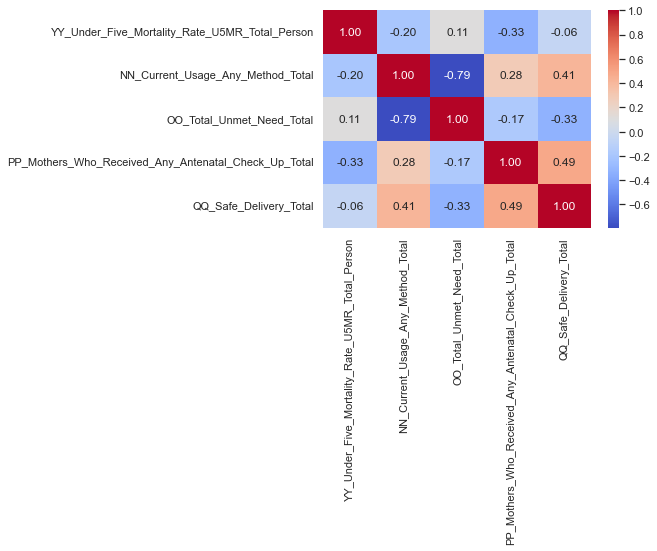

In [18]:
#Correlation matrix between target and some other important-seeming variables.

graph = sns.heatmap(data[["YY_Under_Five_Mortality_Rate_U5MR_Total_Person","NN_Current_Usage_Any_Method_Total","OO_Total_Unmet_Need_Total", "PP_Mothers_Who_Received_Any_Antenatal_Check_Up_Total", "QQ_Safe_Delivery_Total"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

#From this, we see that PP_Mothers_Who_Received_Any_Antenatal_Check_Up_Total is somewhat strongly correlated with the target.

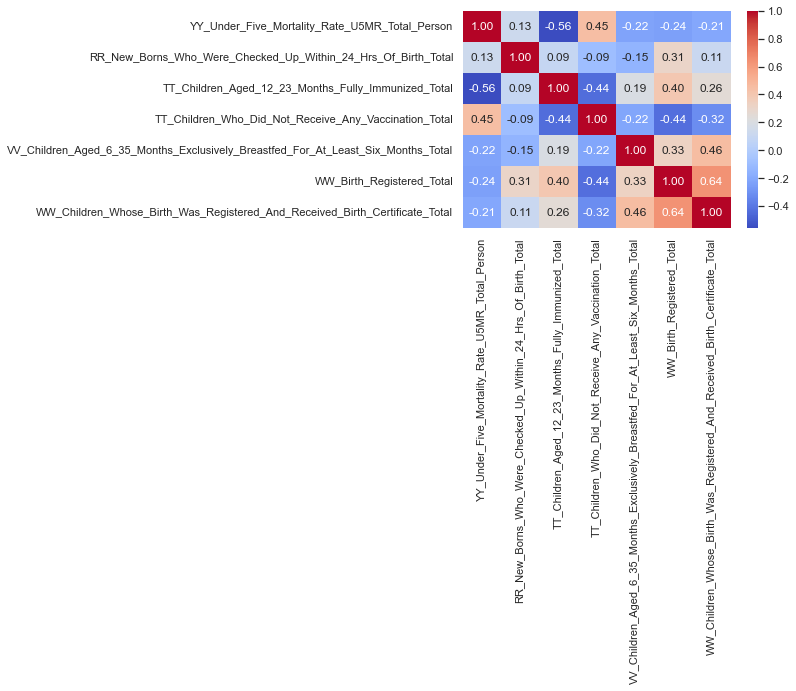

In [19]:
#Correlation matrix between target and some other important-seeming variables.

graph = sns.heatmap(data[["YY_Under_Five_Mortality_Rate_U5MR_Total_Person","RR_New_Borns_Who_Were_Checked_Up_Within_24_Hrs_Of_Birth_Total", "TT_Children_Aged_12_23_Months_Fully_Immunized_Total", "TT_Children_Who_Did_Not_Receive_Any_Vaccination_Total", "VV_Children_Aged_6_35_Months_Exclusively_Breastfed_For_At_Least_Six_Months_Total", "WW_Birth_Registered_Total", "WW_Children_Whose_Birth_Was_Registered_And_Received_Birth_Certificate_Total"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

#From this, we see that TT_Children_Aged_12_23_Months_Fully_Immunized_Total and
#TT_Children_Who_Did_Not_Receive_Any_Vaccination_Total are strongly correlated with the target.

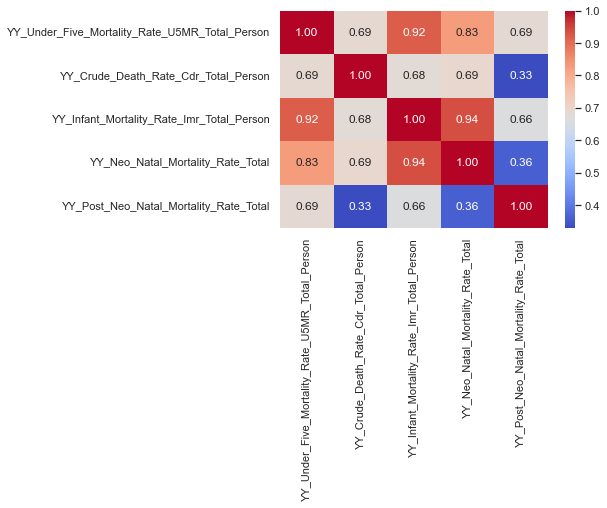

In [20]:
#Correlation matrix between target and some other important-seeming variables.

graph = sns.heatmap(data[["YY_Under_Five_Mortality_Rate_U5MR_Total_Person","YY_Crude_Death_Rate_Cdr_Total_Person", "YY_Infant_Mortality_Rate_Imr_Total_Person", "YY_Neo_Natal_Mortality_Rate_Total", "YY_Post_Neo_Natal_Mortality_Rate_Total"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

#Unsurprisingly, we see that all four of the included features are strongly correlated with the target,
#especially YY_Infant_Mortality_Rate_Imr_Total_Person.

Clearly, I did not end up using all of the variables even from my "Tier 1" list of features in the correlation matrices. I tried to choose those which I felt were most important and avoid overlap with features that conveyed similar information. Additionally, I mostly chose to only use the Person_Total version of features (without distinguishing based on location or gender), as I felt that the distinctions among base features would likely be greater, at least in most cases, than the distinctions in location or gender for the same feature. This was a measure taken to keep the preprocessing stage reasonable and not overwhelming.

Reasons for choosing to examine these variables through correlation matrix:
"AA_Population_Total" - to see if district population (overpopulation, etc.) has an effect on U5MR
"BB_Average_Household_Size_All_Total" - also related to possible overburdening of financial resources, easier spread of disease, etc.
"BB_Dependency_Ratio_Total" - greater dependency ratio (hcildren and elders) leads to more burden on household earners
"CC_Sex_Ratio_0_4_Years_Total" - gender selective abortion/infanticide, favoring of (usually male) children in nutrition, etc. can lead to gender imbalance in young years
"DD_Person_Total" - total effective literacy rate; perhaps greater education levels are correlated with lower U5MR
"DD_Male_Total" - male effective literacy rate; I chose to examine this variable separated by gender because women's education levels are found to be linked to child health
"DD_Female_Total" - female effective literacy rate; this feature was more important to me than the male counterpart, but I found little difference in correlation with the target
"EE_Mean_Age_At_Marriage_Female_Total" - younger ages are linked to poverty, lower education rates, poor child health
"FF_Children_Currently_Attending_School_Age_6_17_Years_Person_Total" - the greater this is, likely the less poverty and child labor, greater emphasis on keeping children in school (esp. girls) rather than making them work or get married
"GG_Children_Aged_5_14_Years_Engaged_In_Work_Person_Total" - child labor usually is linked to poverty
"GG_Work_Participation_Rate_15_Years_And_Above_Person_Total" - high unemployment rates are linked to poverty
"LL_Crude_Birth_Rate_Cbr_Total" - number of live births per 1,000 population; higher CBR may be linked to less family planning and fewer financial/healthcare resources
"LL_Median_Age_At_First_Live_Birth_Of_Women_Aged_15_49_Years_Total" - lower age may be linked to poverty and lower education and lead to poor child health outcomes
"LL_Mean_Number_Of_Children_Ever_Born_To_Women_Aged_15_49_Years_Total" - again, may be linked to less family planning and fewer financial/healthcare resources
"MM_Pregnancy_To_Women_Aged_15_49_Years_Resulting_In_Abortion_Total" - often occurs because they are unable to afford the child, for health reasons to not bring the pregnancy to term, but also for sex selection
"MM_Abortion_Performed_By_Skilled_Health_Personnel_Total" - abortions may be self-induced, which signals lack of financial resources or access to healthcare professionals/facilities
"NN_Current_Usage_Any_Method_Total" - usage of any sort of family planning can possibly signify greater attention to health needs, greater education or greater access to financial resources/healthcare facilities
"OO_Total_Unmet_Need_Total" - unmet need for family planning can also result in children being born who are unable to be sustained and suffer from negative health outcomes
"PP_Mothers_Who_Received_Any_Antenatal_Check_Up_Total" - indicates greater healthcare access (facilities/professionals)
"QQ_Safe_Delivery_Total" - indicates greater healthcare access (facilities/professionals)
"RR_New_Borns_Who_Were_Checked_Up_Within_24_Hrs_Of_Birth_Total" - indicates greater healthcare access (facilities/professionals)
"TT_Children_Aged_12_23_Months_Fully_Immunized_Total" - indicates greater healthcare access (facilities/professionals) and also family/community attitudes toward immunization/child healthcare
"TT_Children_Who_Did_Not_Receive_Any_Vaccination_Total" - may signal lack of healthcare access (facilities/professionals) or negative family/community attitudes toward immunization/child healthcare
"VV_Children_Aged_6_35_Months_Exclusively_Breastfed_For_At_Least_Six_Months_Total" - related to mother/child health needs, financial resources, parent education about child health, time that mother can spend with child (i.e., not working or otherwise occupied)
"WW_Birth_Registered_Total" - registration of births, deaths and stillbirths is compulsory in India (although actual implementation may be much less)
"WW_Children_Whose_Birth_Was_Registered_And_Received_Birth_Certificate_Total" - birth certificates must be applied for and obtained through local authorities; lower rates may signify less access to or less trust in authorities, not giving importance to the certificate, etc.
"YY_Crude_Death_Rate_Cdr_Total_Person" - number of deaths scaled to local population; higher rate may signify poor healthcare or greater health concerns in general
"YY_Infant_Mortality_Rate_Imr_Total_Person" - deaths per 1,000 live births before first birthday; higher rate may signify poor healthcare or greater health concerns in general
"YY_Neo_Natal_Mortality_Rate_Total" - deaths per 1,000 live births between first 0-27 days; higher rate may signify poor healthcare or greater health concerns in general
"YY_Post_Neo_Natal_Mortality_Rate_Total" - deaths per 1,000 live births between 28-364 days; higher rate may signify poor healthcare or greater health concerns in general



Based on the correlation matrices, we will continue with:
State_Name
AA_Population_Total
BB_Dependency_Ratio_Total
DD_Person_Total
FF_Children_Currently_Attending_School_Age_6_17_Years_Person_Total
GG_Children_Aged_5_14_Years_Engaged_In_Work_Person_Total
LL_Crude_Birth_Rate_Cbr_Total
LL_Mean_Number_Of_Children_Ever_Born_To_Women_Aged_15_49_Years_Total
PP_Mothers_Who_Received_Any_Antenatal_Check_Up_Total
TT_Children_Aged_12_23_Months_Fully_Immunized_Total
TT_Children_Who_Did_Not_Receive_Any_Vaccination_Total
YY_Crude_Death_Rate_Cdr_Total_Person
YY_Infant_Mortality_Rate_Imr_Total_Person
YY_Neo_Natal_Mortality_Rate_Total
YY_Post_Neo_Natal_Mortality_Rate_Total
YY_Under_Five_Mortality_Rate_U5MR_Total_Person


We can continue to examine some of the other features from our Tier 1 and Tier 2 lists as we see fit. Also, some of the features, in particular among the last four, may be omitted or collapsed using a feature reduction method because their reasons for taking place probably very closely mirror those for U5MR, and therefore they may not lend much useful information in actually understanding what contributes to U5MR. For now, let us create a new dataframe, data2, using the selected columns.

In [21]:
data2 = data[['State_Name', 'AA_Population_Total', 'BB_Dependency_Ratio_Total', 'DD_Person_Total', 'FF_Children_Currently_Attending_School_Age_6_17_Years_Person_Total', 'GG_Children_Aged_5_14_Years_Engaged_In_Work_Person_Total', 'LL_Crude_Birth_Rate_Cbr_Total', 'LL_Mean_Number_Of_Children_Ever_Born_To_Women_Aged_15_49_Years_Total', 'PP_Mothers_Who_Received_Any_Antenatal_Check_Up_Total', 'TT_Children_Aged_12_23_Months_Fully_Immunized_Total', 'TT_Children_Who_Did_Not_Receive_Any_Vaccination_Total', 'YY_Crude_Death_Rate_Cdr_Total_Person', 'YY_Infant_Mortality_Rate_Imr_Total_Person', 'YY_Neo_Natal_Mortality_Rate_Total', 'YY_Post_Neo_Natal_Mortality_Rate_Total', 'YY_Under_Five_Mortality_Rate_U5MR_Total_Person']].copy()
data2

State_Name  AA_Population_Total  \
State_District_Name                                     
Barpeta                    Assam                64606   
Bongaigaon                 Assam                84012   
Cachar                     Assam               127158   
Darrang                    Assam                29048   
Dhemaji                    Assam                75451   
...                          ...                  ...   
Pithoragarh          Uttarakhand               102999   
Rudraprayag          Uttarakhand               139025   
Tehri Garhwal        Uttarakhand               205575   
Udham Singh Nagar    Uttarakhand                91518   
Uttarkashi           Uttarakhand                76648   

                     BB_Dependency_Ratio_Total  DD_Person_Total  \
State_District_Name                                               
Barpeta                                  65.40            78.60   
Bongaigaon                               62.50            79.30   
Cachar                                   66.10            85.30   
Darrang                                  63.50            73.90   
Dhemaji                                  64.40            81.60   
...                                        ...              ...   
Pithoragarh                              69.07            87.31   
Rudraprayag                              73.57            84.60   
Tehri Garhwal                            77.80            75.66   
Udham Singh Nagar                        59.59            79.53   
Uttarkashi                               67.22            79.96   

                     FF_Children_Currently_Attending_School_Age_6_17_Years_Person_Total  \
State_District_Name                                                                       
Barpeta                                                          89.60                    
Bongaigaon                                                       90.70                    
Cachar                                                           85.50                    
Darrang                                                          88.20                    
Dhemaji                                                          93.80                    
...                                                                ...                    
Pithoragarh                                                      98.28                    
Rudraprayag                                                      98.87                    
Tehri Garhwal                                                    97.99                    
Udham Singh Nagar                                                88.78                    
Uttarkashi                                                       97.98                    

                     GG_Children_Aged_5_14_Years_Engaged_In_Work_Person_Total  \
State_District_Name                                                             
Barpeta                                                           2.20          
Bongaigaon                                                        2.30          
Cachar                                                            3.50          
Darrang                                                           3.10          
Dhemaji                                                           1.10          
...                                                                ...          
Pithoragarh                                                       0.27          
Rudraprayag                                                       0.09          
Tehri Garhwal                                                     2.07          
Udham Singh Nagar                                                 1.80          
Uttarkashi                                                        1.76          

                     LL_Crude_Birth_Rate_Cbr_Total  \
State_District_Name                                  
Barpeta                                      20.40   
Bongaiga

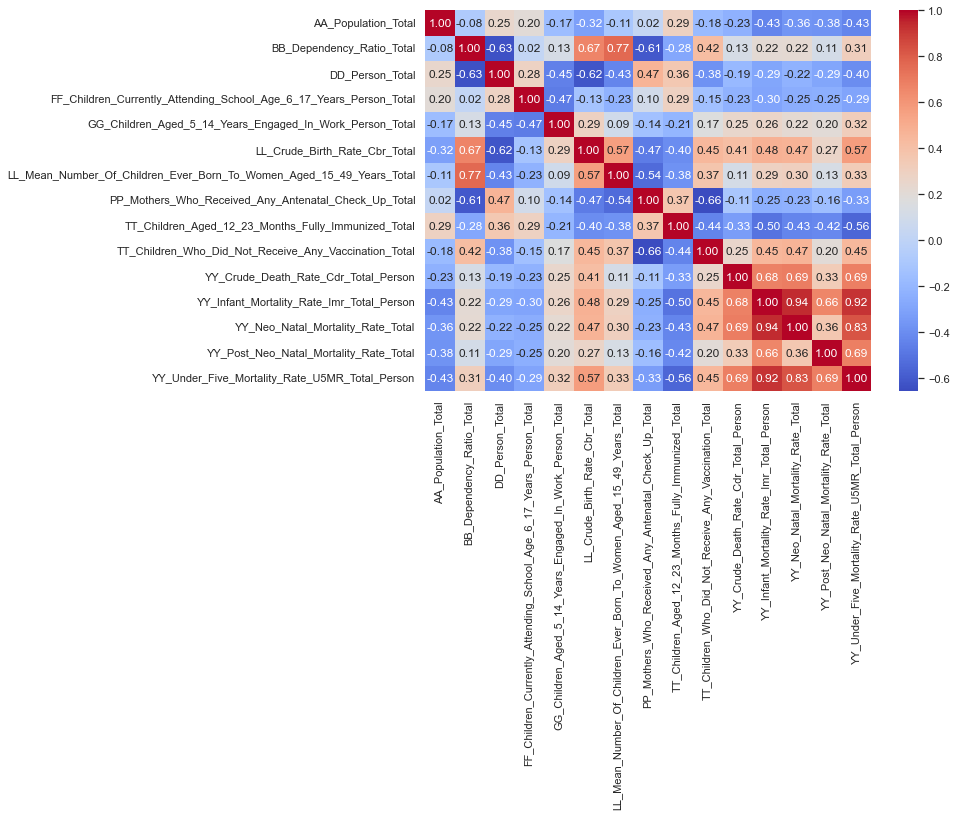

In [22]:
#One more correlation matrix between target and the chosen numerical variables to see them all at once.
plt.figure(figsize=(10,7))
graph = sns.heatmap(data2[["AA_Population_Total", 'BB_Dependency_Ratio_Total', 'DD_Person_Total', 'FF_Children_Currently_Attending_School_Age_6_17_Years_Person_Total', 'GG_Children_Aged_5_14_Years_Engaged_In_Work_Person_Total', 'LL_Crude_Birth_Rate_Cbr_Total', 'LL_Mean_Number_Of_Children_Ever_Born_To_Women_Aged_15_49_Years_Total', 'PP_Mothers_Who_Received_Any_Antenatal_Check_Up_Total', 'TT_Children_Aged_12_23_Months_Fully_Immunized_Total', 'TT_Children_Who_Did_Not_Receive_Any_Vaccination_Total', 'YY_Crude_Death_Rate_Cdr_Total_Person', 'YY_Infant_Mortality_Rate_Imr_Total_Person', 'YY_Neo_Natal_Mortality_Rate_Total', 'YY_Post_Neo_Natal_Mortality_Rate_Total', 'YY_Under_Five_Mortality_Rate_U5MR_Total_Person']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

Now, let us visualize some differences in location and gender for the same base features in order to understand what sort of impact these differences have on U5MR. One disadvantage of the way the data is presented,  aggregated by district and often broken out into trifold location/gender distributions, is that it is sometimes hard to depict different variables on the same graph (i.e., side by side). For example, we cannot see male and female literacy rate together side by side by naming "sex" as a characteristic of the samples to be shown through different hues. We either have to superimpose the male and female versions of the variable, which is somewhat helpful but can also obscure some information, or we have to make separate graphs and view them one on top of another. However, I think that it will suffice to show whether a feature varies so greatly between its location/gender breakouts that I should include both, or only one, in the modelling process instead of the total base feature.

I am not going to visualize differences in YY_Crude_Death_Rate_Cdr_Total_Person, YY_Infant_Mortality_Rate_Imr_Total_Person, YY_Neo_Natal_Mortality_Rate_Total and YY_Post_Neo_Natal_Mortality_Rate_Total because I believe that these features are already closely related enough in cause to U5MR that they do not contribute much to understanding root causes of U5MR. Of course, they will still be included in the dataset I use when I create models.

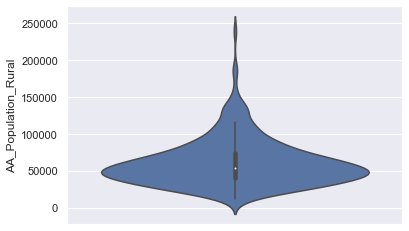

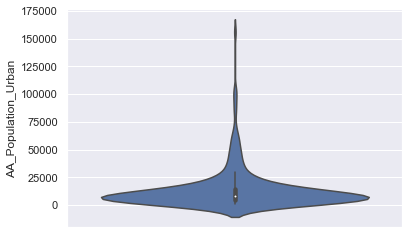

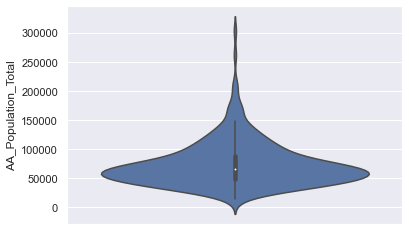

In [23]:
sns.set(style="darkgrid")
sns.violinplot(y=data["AA_Population_Rural"])
plt.show()

sns.set(style="darkgrid")
sns.violinplot(y=data["AA_Population_Urban"])
plt.show()

sns.set(style="darkgrid")
sns.violinplot(y=data["AA_Population_Total"])
plt.show()

#There is a distinct difference in population distribution across rural and urban areas.
#However, this is unsurprising, given that much of India still is rural.
# Therefore, I will not include different rural/urban variations of this feature in the dataset.

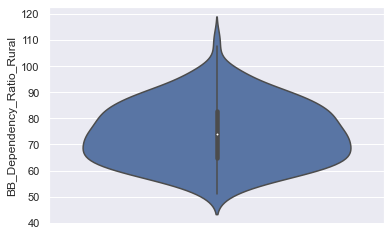

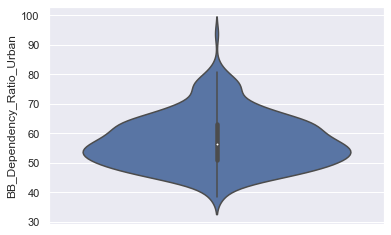

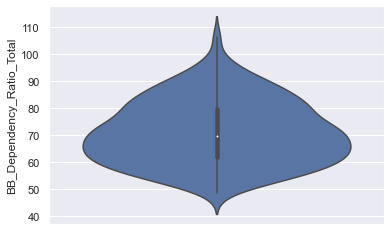

In [24]:
sns.set(style="darkgrid")
sns.violinplot(y=data["BB_Dependency_Ratio_Rural"])
plt.show()

sns.set(style="darkgrid")
sns.violinplot(y=data["BB_Dependency_Ratio_Urban"])
plt.show()

sns.set(style="darkgrid")
sns.violinplot(y=data["BB_Dependency_Ratio_Total"])
plt.show()

#Rural areas have much higher dependency ratios, on the whole.
#This may suggest higher birth rates, leading to higher population,
# and/or lower workforce participation, leading to less financial resources.

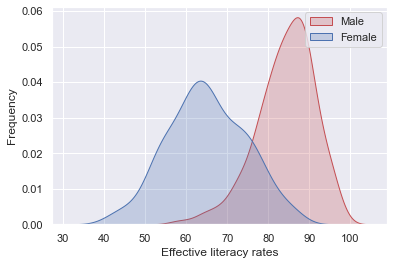

In [25]:
sns.set(style="darkgrid")
fig = sns.kdeplot(data['DD_Male_Total'], shade=True, color="r")
fig = sns.kdeplot(data['DD_Female_Total'], shade=True, color="b")
fig = fig.legend(["Male", "Female"])
plt.xlabel('Effective literacy rates', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# We can see that the distributions of male and female literacy are quite different,
#with the highest number of female rates being between 60-70% and the highest number of male rates being between 80-90%.
#So, we may consider that the possibility of some contribution of the gender difference to U5MR
# and bring these variables into the dataset as well.

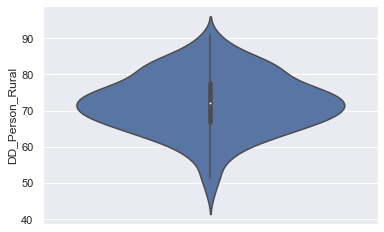

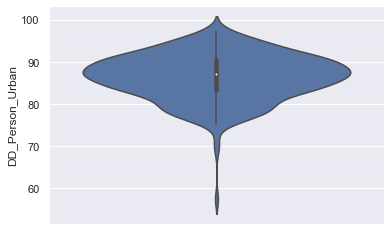

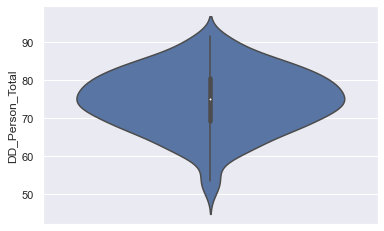

In [26]:
sns.set(style="darkgrid")
sns.violinplot(y=data["DD_Person_Rural"])
plt.show()

sns.set(style="darkgrid")
sns.violinplot(y=data["DD_Person_Urban"])
plt.show()

sns.set(style="darkgrid")
sns.violinplot(y=data["DD_Person_Total"])
plt.show()

#Looking at effective literacy rate across locations,
# we can see that rural areas have a more equal distribution,
# whereas urban areas tend to have higher literacy rates and a left [downward] skew.
#This also suggests that there is a rural/urban divide, which may contribute to U5MR.

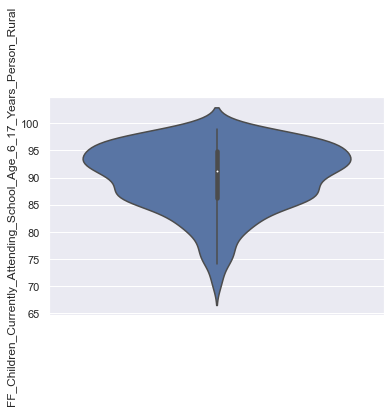

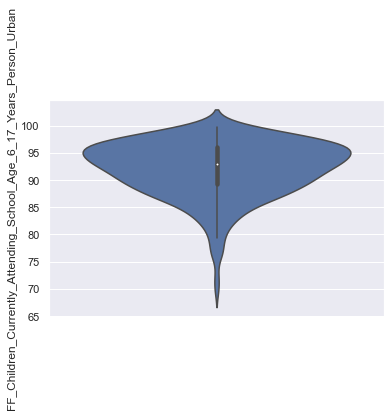

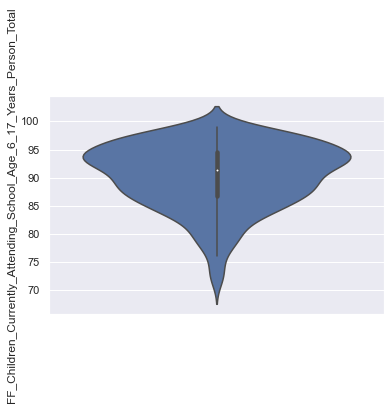

In [27]:
sns.set(style="darkgrid")
sns.violinplot(y=data["FF_Children_Currently_Attending_School_Age_6_17_Years_Person_Rural"])
plt.show()

sns.set(style="darkgrid")
sns.violinplot(y=data["FF_Children_Currently_Attending_School_Age_6_17_Years_Person_Urban"])
plt.show()

sns.set(style="darkgrid")
sns.violinplot(y=data["FF_Children_Currently_Attending_School_Age_6_17_Years_Person_Total"])
plt.show()

#There is some notable distinction between rural and urban populations in this variable.
#Overall, urban areas have high rates of children's school attendance.

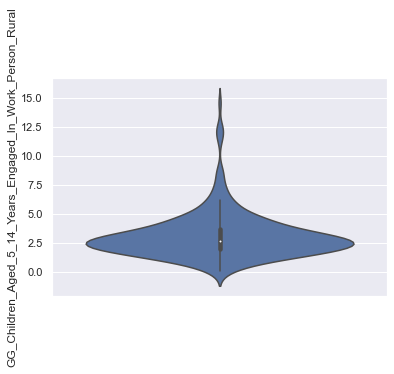

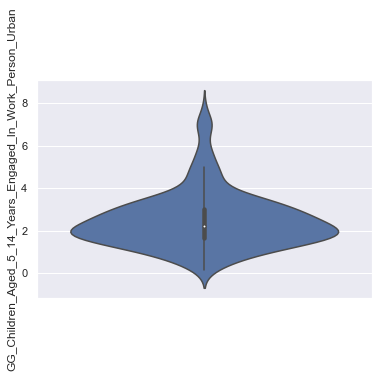

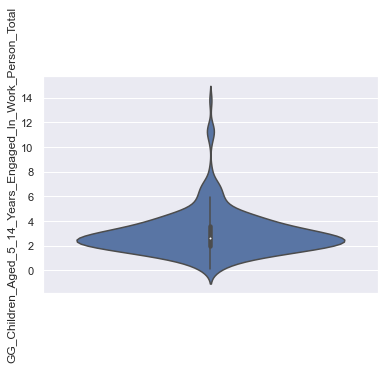

In [28]:
sns.set(style="darkgrid")
sns.violinplot(y=data["GG_Children_Aged_5_14_Years_Engaged_In_Work_Person_Rural"])
plt.show()

sns.set(style="darkgrid")
sns.violinplot(y=data["GG_Children_Aged_5_14_Years_Engaged_In_Work_Person_Urban"])
plt.show()

sns.set(style="darkgrid")
sns.violinplot(y=data["GG_Children_Aged_5_14_Years_Engaged_In_Work_Person_Total"])
plt.show()

#Perhaps as a corollary to the finding above, children's labor participation is much lower in urban areas.
#We will include the rural/urban versions of this variable.

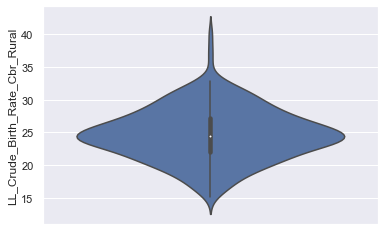

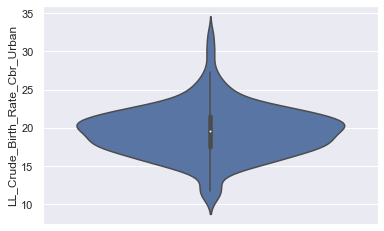

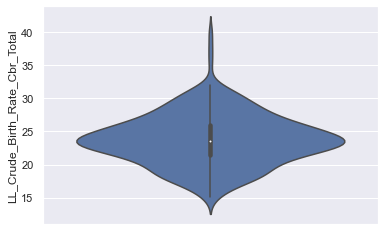

In [29]:
sns.set(style="darkgrid")
sns.violinplot(y=data["LL_Crude_Birth_Rate_Cbr_Rural"])
plt.show()

sns.set(style="darkgrid")
sns.violinplot(y=data["LL_Crude_Birth_Rate_Cbr_Urban"])
plt.show()

sns.set(style="darkgrid")
sns.violinplot(y=data["LL_Crude_Birth_Rate_Cbr_Total"])
plt.show()

#Crude birth rate distributions appear to be similar in rural and urban areas,
# with the exception being that it is slightly lower in urban areas.
# No need to include the different breakouts.

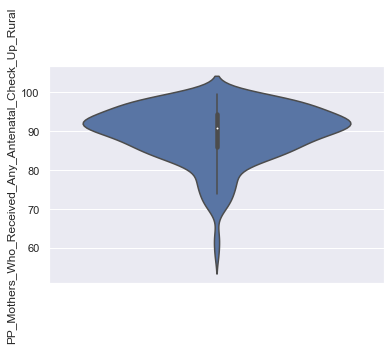

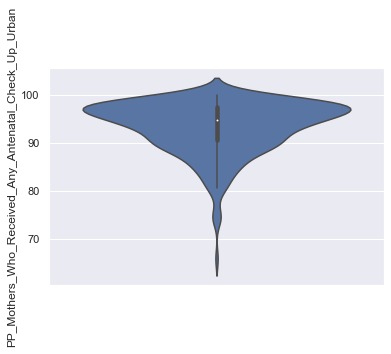

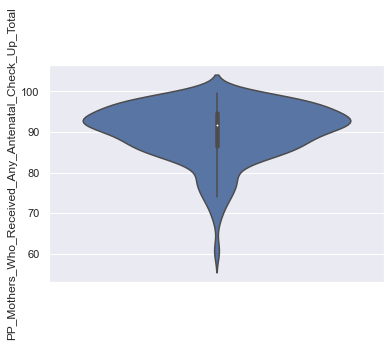

In [30]:
sns.set(style="darkgrid")
sns.violinplot(y=data["PP_Mothers_Who_Received_Any_Antenatal_Check_Up_Rural"])
plt.show()

sns.set(style="darkgrid")
sns.violinplot(y=data["PP_Mothers_Who_Received_Any_Antenatal_Check_Up_Urban"])
plt.show()

sns.set(style="darkgrid")
sns.violinplot(y=data["PP_Mothers_Who_Received_Any_Antenatal_Check_Up_Total"])
plt.show()

#Somewhat surprisingly, this does not appear to be too different across locations.
#Let us avoid discriminating between rural and urban antenatal care rates in the dataset.

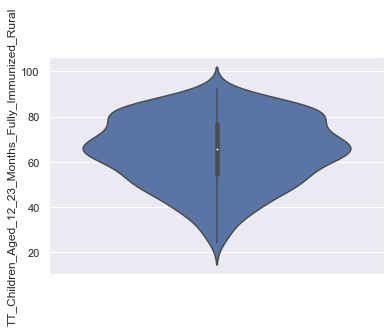

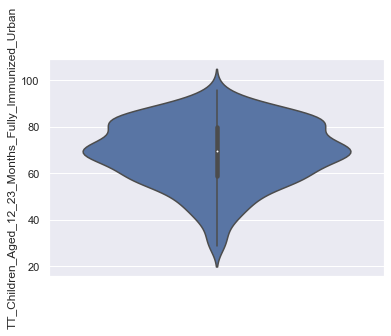

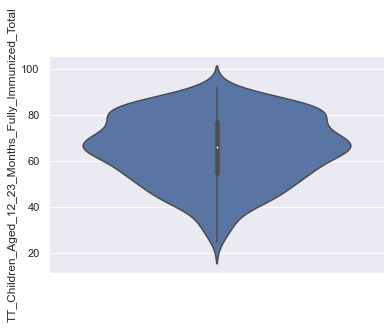

In [31]:
sns.set(style="darkgrid")
sns.violinplot(y=data["TT_Children_Aged_12_23_Months_Fully_Immunized_Rural"])
plt.show()

sns.set(style="darkgrid")
sns.violinplot(y=data["TT_Children_Aged_12_23_Months_Fully_Immunized_Urban"])
plt.show()

sns.set(style="darkgrid")
sns.violinplot(y=data["TT_Children_Aged_12_23_Months_Fully_Immunized_Total"])
plt.show()

#This also does not appear to be too different across rural and urban areas.

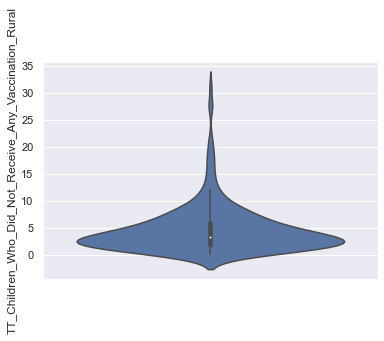

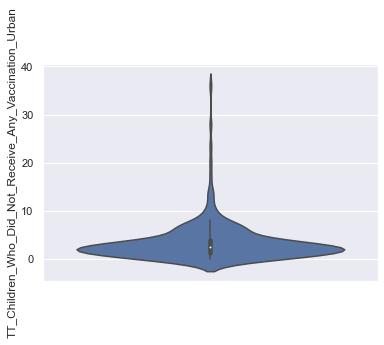

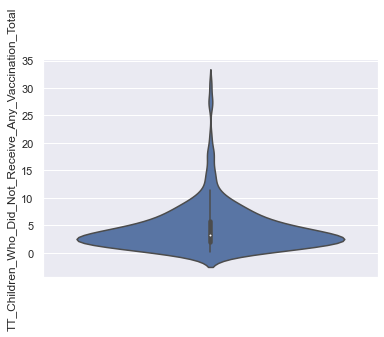

In [32]:
sns.set(style="darkgrid")
sns.violinplot(y=data["TT_Children_Who_Did_Not_Receive_Any_Vaccination_Rural"])
plt.show()

sns.set(style="darkgrid")
sns.violinplot(y=data["TT_Children_Who_Did_Not_Receive_Any_Vaccination_Urban"])
plt.show()

sns.set(style="darkgrid")
sns.violinplot(y=data["TT_Children_Who_Did_Not_Receive_Any_Vaccination_Total"])
plt.show()

#There is also not much difference here between rural and urban communities,
# so we will not include the different variables for this.
# Urban appears to have a slightly greater range and, somewhat surprisingly,
# its distribution includes more communities with a greater rate of non-vaccination.

C:\Users\dralu\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\dralu\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


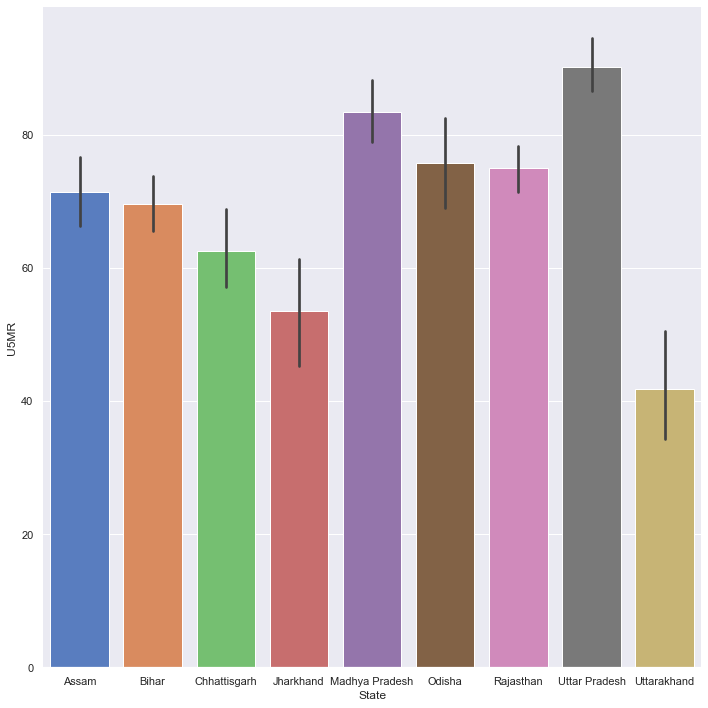

In [33]:
# Explore State vs. U5MR
g  = sns.factorplot(x="State_Name",y="YY_Under_Five_Mortality_Rate_U5MR_Total_Person",data=data2,kind="bar", size = 10 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("U5MR")
g = g.set_xlabels("State")
#We see that, even though all of these states have poor health outcomes
# and decision-making can be highly decentralized,
# some states undoubtedly have worse rates than others, Uttar Pradesh being the worst and Uttarakhand being the least bad.
#Therefore, we may conclude that certain state policies or circumstances play a role in U5MR as well.

In [34]:
data3 = data[['BB_Dependency_Ratio_Rural', 'BB_Dependency_Ratio_Urban', 'DD_Male_Total', 'DD_Female_Total', 'DD_Person_Rural', 'DD_Person_Urban', 'FF_Children_Currently_Attending_School_Age_6_17_Years_Person_Rural', 'FF_Children_Currently_Attending_School_Age_6_17_Years_Person_Urban', 'GG_Children_Aged_5_14_Years_Engaged_In_Work_Person_Rural', 'GG_Children_Aged_5_14_Years_Engaged_In_Work_Person_Urban']].copy()
data_final = pd.concat([data2, data3], axis=1, join='inner')
data_final
#We have made a new dataset with the chosen variables from the original dataframe,
#although we can still add more (e.g., dummy variables)

State_Name  AA_Population_Total  \
State_District_Name                                     
Barpeta                    Assam                64606   
Bongaigaon                 Assam                84012   
Cachar                     Assam               127158   
Darrang                    Assam                29048   
Dhemaji                    Assam                75451   
...                          ...                  ...   
Pithoragarh          Uttarakhand               102999   
Rudraprayag          Uttarakhand               139025   
Tehri Garhwal        Uttarakhand               205575   
Udham Singh Nagar    Uttarakhand                91518   
Uttarkashi           Uttarakhand                76648   

                     BB_Dependency_Ratio_Total  DD_Person_Total  \
State_District_Name                                               
Barpeta                                  65.40            78.60   
Bongaigaon                               62.50            79.30   
Cachar                                   66.10            85.30   
Darrang                                  63.50            73.90   
Dhemaji                                  64.40            81.60   
...                                        ...              ...   
Pithoragarh                              69.07            87.31   
Rudraprayag                              73.57            84.60   
Tehri Garhwal                            77.80            75.66   
Udham Singh Nagar                        59.59            79.53   
Uttarkashi                               67.22            79.96   

                     FF_Children_Currently_Attending_School_Age_6_17_Years_Person_Total  \
State_District_Name                                                                       
Barpeta                                                          89.60                    
Bongaigaon                                                       90.70                    
Cachar                                                           85.50                    
Darrang                                                          88.20                    
Dhemaji                                                          93.80                    
...                                                                ...                    
Pithoragarh                                                      98.28                    
Rudraprayag                                                      98.87                    
Tehri Garhwal                                                    97.99                    
Udham Singh Nagar                                                88.78                    
Uttarkashi                                                       97.98                    

                     GG_Children_Aged_5_14_Years_Engaged_In_Work_Person_Total  \
State_District_Name                                                             
Barpeta                                                           2.20          
Bongaigaon                                                        2.30          
Cachar                                                            3.50          
Darrang                                                           3.10          
Dhemaji                                                           1.10          
...                                                                ...          
Pithoragarh                                                       0.27          
Rudraprayag                                                       0.09          
Tehri Garhwal                                                     2.07          
Udham Singh Nagar                                                 1.80          
Uttarkashi                                                        1.76          

                     LL_Crude_Birth_Rate_Cbr_Total  \
State_District_Name                                  
Barpeta                                      20.40   
Bongaiga

In [35]:
colnames = data_final.columns
if any(col in data_final.columns for col in nan_cols20):
    print('At least one column from the final dataset had at least 20% of its values imputed.')
else:
    print('No column from the final dataset had at least 20% of its values imputed.')
    
#None of the columns in our final dataset had at least 20% of its values imputed.
#This is good; it means that our data is primarily accurate to each sample's unique circumstances.

No column from the final dataset had at least 20% of its values imputed.


In [36]:
states = data["State_Name"]
#We are turning the column State_Name into an object so that we can use it later.

In [37]:
data_std = (data_final - data_final.mean()) / data_final.std()
data_std

#We are manually standardizing to bring all features onto the same scale because
#using scikit-learn to do so outputs an array,
# which would have to be recast as a dataframe and have column names re-added.

C:\Users\dralu\AppData\Local\Temp/ipykernel_5528/1191094213.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_std = (data_final - data_final.mean()) / data_final.std()


AA_Population_Total  BB_Dependency_Ratio_Rural  \
State_District_Name                                                   
Barpeta                        -0.247915                  -0.525672   
Bongaigaon                      0.254661                  -0.619780   
Cachar                          1.372053                  -0.397343   
Darrang                        -1.168794                  -0.842216   
Dhemaji                         0.032949                  -0.748109   
...                                  ...                        ...   
Pithoragarh                     0.746385                  -0.284414   
Rudraprayag                     1.679384                  -0.050000   
Tehri Garhwal                   3.402892                   0.613032   
Udham Singh Nagar               0.449051                  -1.004766   
Uttarkashi                      0.063948                  -0.434131   

                     BB_Dependency_Ratio_Total  BB_Dependency_Ratio_Urban  \
State_District_Name                                                         
Barpeta                              -0.471175                  -1.342947   
Bongaigaon                           -0.716228                  -2.110604   
Cachar                               -0.412024                  -0.564163   
Darrang                              -0.631727                  -1.910346   
Dhemaji                              -0.555676                  -0.541912   
...                                        ...                        ...   
Pithoragarh                          -0.161055                   0.369264   
Rudraprayag                           0.219200                  -1.331821   
Tehri Garhwal                         0.576641                   0.121166   
Udham Singh Nagar                    -0.962127                  -0.506311   
Uttarkashi                           -0.317382                  -0.282689   

                     DD_Female_Total  DD_Male_Total  DD_Person_Rural  \
State_District_Name                                                    
Barpeta                     0.692304       0.133387         0.617516   
Bongaigaon                  0.828511       0.175595         0.568573   
Cachar                      1.603845       0.893136         1.400590   
Darrang                     0.189384      -0.485668         0.115858   
Dhemaji                     0.985673       0.611748         1.082466   
...                              ...            ...              ...   
Pithoragarh                 1.455065       1.775290         1.655089   
Rudraprayag                 1.043300       1.804836         1.541299   
Tehri Garhwal              -0.042168       0.811534         0.150118   
Udham Singh Nagar           0.618961       0.449949         0.610174   
Uttarkashi                  0.370645       1.050714         0.777801   

                     DD_Person_Total  DD_Person_Urban  \
State_District_Name                                     
Barpeta                     0.480091         0.776593   
Bongaigaon                  0.566366         1.615376   
Cachar                      1.305869         1.177751   
Darrang                    -0.099186         1.961830   
Dhemaji                     0.849842         0.667187   
...                              ...              ...   
Pithoragarh                 1.553602         1.657316   
Rudraprayag                 1.219594         1.378329   
Tehri Garhwal               0.117735         0.782064   
Udham Singh Nagar           0.594714        -0.127834   
Uttarkashi                  0.647712         0.754712   

                     FF_Children_Currently_Attending_School_Age_6_17_Years_Person_Rural  \
State_District_Name                                                                       
Barpeta                                                      -0.054615                    
Bongaigaon                                                   -0.004965                    
Cachar                                              

In [38]:
#After standardizing, we see that categorical variable State_Name has been replaced with null values.
data_std.loc[:,"State_Name"]

State_District_Name
Barpeta              NaN
Bongaigaon           NaN
Cachar               NaN
Darrang              NaN
Dhemaji              NaN
                    ... 
Pithoragarh          NaN
Rudraprayag          NaN
Tehri Garhwal        NaN
Udham Singh Nagar    NaN
Uttarkashi           NaN
Name: State_Name, Length: 284, dtype: object

In [39]:
data_std = data_std.drop('State_Name', axis=1)
data_std.insert(0, "State_Name", states)

# So, here we add it back in in its original form in the first index.

In [40]:
data_std = pd.get_dummies(data_std,columns = ['State_Name'],drop_first=True)
data_std
#We also created dummy variables so that we can use the state names in our modelling as numerical values.
#To avoid multicollinearity, the dummy variable for one state (Assam) was dropped.

AA_Population_Total  BB_Dependency_Ratio_Rural  \
State_District_Name                                                   
Barpeta                        -0.247915                  -0.525672   
Bongaigaon                      0.254661                  -0.619780   
Cachar                          1.372053                  -0.397343   
Darrang                        -1.168794                  -0.842216   
Dhemaji                         0.032949                  -0.748109   
...                                  ...                        ...   
Pithoragarh                     0.746385                  -0.284414   
Rudraprayag                     1.679384                  -0.050000   
Tehri Garhwal                   3.402892                   0.613032   
Udham Singh Nagar               0.449051                  -1.004766   
Uttarkashi                      0.063948                  -0.434131   

                     BB_Dependency_Ratio_Total  BB_Dependency_Ratio_Urban  \
State_District_Name                                                         
Barpeta                              -0.471175                  -1.342947   
Bongaigaon                           -0.716228                  -2.110604   
Cachar                               -0.412024                  -0.564163   
Darrang                              -0.631727                  -1.910346   
Dhemaji                              -0.555676                  -0.541912   
...                                        ...                        ...   
Pithoragarh                          -0.161055                   0.369264   
Rudraprayag                           0.219200                  -1.331821   
Tehri Garhwal                         0.576641                   0.121166   
Udham Singh Nagar                    -0.962127                  -0.506311   
Uttarkashi                           -0.317382                  -0.282689   

                     DD_Female_Total  DD_Male_Total  DD_Person_Rural  \
State_District_Name                                                    
Barpeta                     0.692304       0.133387         0.617516   
Bongaigaon                  0.828511       0.175595         0.568573   
Cachar                      1.603845       0.893136         1.400590   
Darrang                     0.189384      -0.485668         0.115858   
Dhemaji                     0.985673       0.611748         1.082466   
...                              ...            ...              ...   
Pithoragarh                 1.455065       1.775290         1.655089   
Rudraprayag                 1.043300       1.804836         1.541299   
Tehri Garhwal              -0.042168       0.811534         0.150118   
Udham Singh Nagar           0.618961       0.449949         0.610174   
Uttarkashi                  0.370645       1.050714         0.777801   

                     DD_Person_Total  DD_Person_Urban  \
State_District_Name                                     
Barpeta                     0.480091         0.776593   
Bongaigaon                  0.566366         1.615376   
Cachar                      1.305869         1.177751   
Darrang                    -0.099186         1.961830   
Dhemaji                     0.849842         0.667187   
...                              ...              ...   
Pithoragarh                 1.553602         1.657316   
Rudraprayag                 1.219594         1.378329   
Tehri Garhwal               0.117735         0.782064   
Udham Singh Nagar           0.594714        -0.127834   
Uttarkashi                  0.647712         0.754712   

                     FF_Children_Currently_Attending_School_Age_6_17_Years_Person_Rural  \
State_District_Name                                                                       
Barpeta                                                      -0.054615                    
Bongaigaon                                                   -0.004965                    
Cachar                                              

In [41]:
data_std.shape

(284, 33)

In [42]:
#Let us save the final dataset as a CSV.
data_std.to_csv('data_std.csv')

In [43]:
X = data_std.drop('YY_Under_Five_Mortality_Rate_U5MR_Total_Person',axis=1)
y = data_std['YY_Under_Five_Mortality_Rate_U5MR_Total_Person']
#defining X (predictors) and y (target)

#Although it is not standard procedure, I chose to leave the splitting into subsets
# until after most data exploration and creating the new dataset that I will use.
#This is because of the enormous size of the original dataset, which would have been very unwieldy to use.
#I am treating the dataframe I have created, data_std, as if it were the original set.

In [44]:
# Divide into training and test sets.
import random
random.seed(123)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape
#We create training and test subsets for X (predictors) and y (target), and check each of their shapes.

(198, 32)

In [45]:
#Save data subsets to new CSVs
X_train.to_csv('X_train.csv')
y_train.to_csv('y_train.csv')
X_test.to_csv('X_test.csv')
y_test.to_csv('y_test.csv')